## 01. Data I/O and Featurization

There are 12 Trp-Cage (TC5b) trajectories we will load and visualize.

If you haven't yet downloaded these files, please follow the instructions in `../TC5b-data`

In [1]:
import os, glob

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#import mdshare
import pyemma

# for visualization of molecular structures:
import nglview
import mdtraj
from threading import Timer
from nglview.player import TrajectoryPlayer

datadir = '../TC5b-data'
filenames = [os.path.join(datadir, s.strip()) for s in """p16959r9c29-whole.xtc 
p16959r9c83-whole.xtc 
p16959r9c100-whole.xtc
p16959r9c109-whole.xtc
p16959r9c127-whole.xtc
p16959r9c151-whole.xtc
p16959r9c166-whole.xtc
p16959r9c219-whole.xtc
p16959r9c312-whole.xtc
p16959r9c394-whole.xtc
p16959r9c631-whole.xtc
p16959r9c726-whole.xtc""".split('\n')]
print(filenames)

pdbfile = os.path.join(datadir, 'xtc_atoms.gro')

# Create a list of mdtraj Trajectory() objects
trajs = []
for fn in filenames:
    print(f'Loading {fn}... ', end='')
    trj = mdtraj.load(fn, top=pdbfile)
    
    
    print('Processing for visualization...', end='')
    # 1. they have ions in them -- let's strip these out
    trj_protein = trj.atom_slice(trj.top.select("protein"))
    # 2. they are not centered - let's center them
    trj_protein.center_coordinates()
    # 3. they are not RMSD-aligned - let's center them on a frame at ~4 us
    trj_protein.superpose(trj_protein, frame=4000, parallel=True)
    trajs.append( trj_protein )
    print('...Done')


['../TC5b-data/p16959r9c29-whole.xtc', '../TC5b-data/p16959r9c83-whole.xtc', '../TC5b-data/p16959r9c100-whole.xtc', '../TC5b-data/p16959r9c109-whole.xtc', '../TC5b-data/p16959r9c127-whole.xtc', '../TC5b-data/p16959r9c151-whole.xtc', '../TC5b-data/p16959r9c166-whole.xtc', '../TC5b-data/p16959r9c219-whole.xtc', '../TC5b-data/p16959r9c312-whole.xtc', '../TC5b-data/p16959r9c394-whole.xtc', '../TC5b-data/p16959r9c631-whole.xtc', '../TC5b-data/p16959r9c726-whole.xtc']
Loading ../TC5b-data/p16959r9c29-whole.xtc... Processing for visualization......Done
Loading ../TC5b-data/p16959r9c83-whole.xtc... Processing for visualization......Done
Loading ../TC5b-data/p16959r9c100-whole.xtc... Processing for visualization......Done
Loading ../TC5b-data/p16959r9c109-whole.xtc... Processing for visualization......Done
Loading ../TC5b-data/p16959r9c127-whole.xtc... Processing for visualization......Done
Loading ../TC5b-data/p16959r9c151-whole.xtc... Processing for visualization......Done
Loading ../TC5b-dat

# Visualize the trajectories

In [2]:
widget = nglview.show_mdtraj(trajs[0])
p = TrajectoryPlayer(widget)
widget.add_ball_and_stick()
# p.spin = True
# def stop_spin():
#     p.spin = False
#    widget.close()
# Timer(30, stop_spin).start()
widget

NGLWidget(max_frame=44183)

# Featurizing and Visualizing the data

Following closely from https://github.com/markovmodel/pyemma_tutorials/blob/master/notebooks/01-data-io-and-featurization.ipynb

In [3]:
# Create a Featurizer object from the molecular topology
feat = pyemma.coordinates.featurizer(pdbfile)
backbone_distance_pairs = feat.pairs(feat.select_Backbone())
feat.add_distances(backbone_distance_pairs, periodic=False)
feat.describe()

['DIST: ASN 1 N 0 - ASN 1 CA 4',
 'DIST: ASN 1 N 0 - ASN 1 C 14',
 'DIST: ASN 1 N 0 - LEU 2 N 16',
 'DIST: ASN 1 N 0 - LEU 2 CA 18',
 'DIST: ASN 1 N 0 - LEU 2 C 33',
 'DIST: ASN 1 N 0 - TYR 3 N 35',
 'DIST: ASN 1 N 0 - TYR 3 CA 37',
 'DIST: ASN 1 N 0 - TYR 3 C 54',
 'DIST: ASN 1 N 0 - ILE 4 N 56',
 'DIST: ASN 1 N 0 - ILE 4 CA 58',
 'DIST: ASN 1 N 0 - ILE 4 C 73',
 'DIST: ASN 1 N 0 - GLN 5 N 75',
 'DIST: ASN 1 N 0 - GLN 5 CA 77',
 'DIST: ASN 1 N 0 - GLN 5 C 90',
 'DIST: ASN 1 N 0 - TRP 6 N 92',
 'DIST: ASN 1 N 0 - TRP 6 CA 94',
 'DIST: ASN 1 N 0 - TRP 6 C 114',
 'DIST: ASN 1 N 0 - LEU 7 N 116',
 'DIST: ASN 1 N 0 - LEU 7 CA 118',
 'DIST: ASN 1 N 0 - LEU 7 C 133',
 'DIST: ASN 1 N 0 - LYS 8 N 135',
 'DIST: ASN 1 N 0 - LYS 8 CA 137',
 'DIST: ASN 1 N 0 - LYS 8 C 155',
 'DIST: ASN 1 N 0 - ASP 9 N 157',
 'DIST: ASN 1 N 0 - ASP 9 CA 159',
 'DIST: ASN 1 N 0 - ASP 9 C 167',
 'DIST: ASN 1 N 0 - GLY 10 N 169',
 'DIST: ASN 1 N 0 - GLY 10 CA 171',
 'DIST: ASN 1 N 0 - GLY 10 C 174',
 'DIST: ASN 1 N 0 

In [4]:
# Featurize the trajectories ...
# ...using the mdtraj Trajectory coordinates we've already loaded and processed

data = pyemma.coordinates.load(filenames, features=feat)
# data = pyemma.coordinates.source([t.xyz for t in trajs], features=feat)

print('type of data:', type(data))
print('lengths:', len(data))
print('shape of elements:', data[0].shape)
print('n_atoms:', feat.topology.n_atoms)

# data_concatenated = np.concatenate(data)
# pyemma.plots.plot_feature_histograms(data_concatenated, feature_labels=feat);


Obtaining file info:   0%|                                                 | 0/12 [00:00<?, ?it/s]

getting output of FeatureReader:   0%|                                     | 0/24 [00:00<?, ?it/s]

type of data: <class 'list'>
lengths: 12
shape of elements: (44184, 1770)
n_atoms: 375


In [49]:
# Do a single dimensionality reduction so we can visualize the landscape
## Compare VAMP and TICA and PCA

dim = 3
lag = 100  # 100 x 100 ps = 10 ns vamp lag
number_of_splits = 10
validation_fraction = 0.5
out_name = 'score_cv_out'
save = True

#pca = pyemma.coordinates.pca(data_concatenated, dim=3)
pca = pyemma.coordinates.pca(data, dim=dim)
pca_concatenated = np.concatenate(pca.get_output(stride=5))

tica = pyemma.coordinates.tica(data, lag=lag, dim=dim, scaling = 'km')
tica_concatenated = np.concatenate(tica.get_output(stride=5))

vamp = pyemma.coordinates.vamp(data, lag=lag, dim=dim, scaling = 'km')
vamp_concatenated = np.concatenate(vamp.get_output(stride=5))

# cluster = pyemma.coordinates.cluster_kmeans(vamp, k=100, max_iter=50, stride=5)

calc mean+cov:   0%|                                                       | 0/24 [00:00<?, ?it/s]

getting output of PCA:   0%|                                               | 0/12 [00:00<?, ?it/s]

calculate covariances:   0%|                                               | 0/24 [00:00<?, ?it/s]

getting output of TICA:   0%|                                              | 0/12 [00:00<?, ?it/s]

calculate covariances:   0%|                                               | 0/24 [00:00<?, ?it/s]

getting output of VAMP:   0%|                                              | 0/12 [00:00<?, ?it/s]

getting output of PCA:   0%|                                               | 0/12 [00:00<?, ?it/s]

getting output of TICA:   0%|                                              | 0/12 [00:00<?, ?it/s]

getting output of VAMP:   0%|                                              | 0/12 [00:00<?, ?it/s]

getting output of PCA:   0%|                                               | 0/12 [00:00<?, ?it/s]

getting output of TICA:   0%|                                              | 0/12 [00:00<?, ?it/s]

getting output of VAMP:   0%|                                              | 0/12 [00:00<?, ?it/s]

<Figure size 360x360 with 0 Axes>

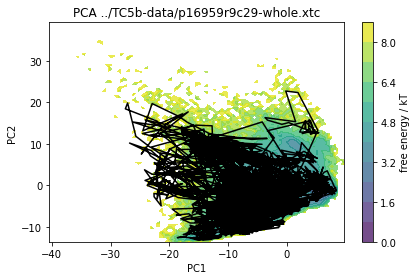

<Figure size 360x360 with 0 Axes>

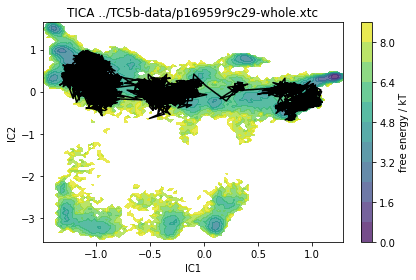

<Figure size 360x360 with 0 Axes>

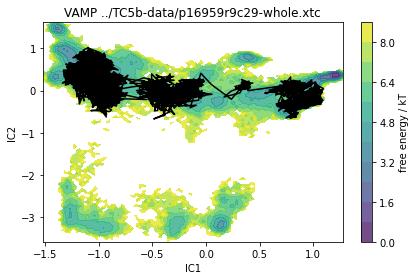

<Figure size 360x360 with 0 Axes>

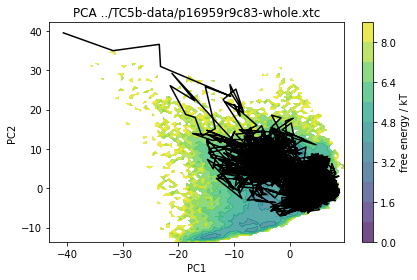

<Figure size 360x360 with 0 Axes>

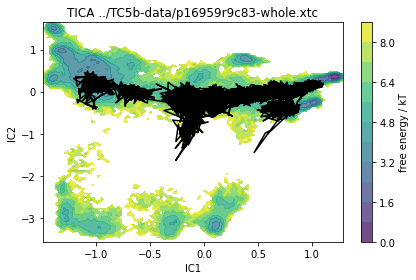

<Figure size 360x360 with 0 Axes>

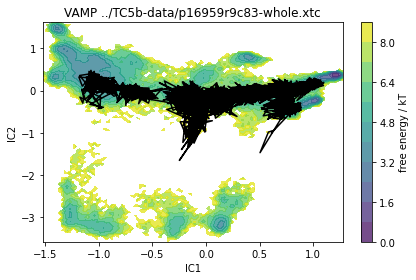

In [50]:
vamp_concatenated.shape
ntraj = len(filenames)
for n in range(2):
    plt.figure(figsize=(5, 5))
    pyemma.plots.plot_free_energy(pca_concatenated[:,0], pca_concatenated[:,1], cbar=True, cmap='viridis', ncontours=10, alpha=0.75)
    # plot the trace of the trajectory
    pca_coords = pca.get_output(stride=5)
    plt.plot(pca_coords[n][:,0],pca_coords[n][:,1], 'k-')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA ' + filenames[n])
    plt.tight_layout()

    plt.figure(figsize=(5, 5))
    pyemma.plots.plot_free_energy(tica_concatenated[:,0], tica_concatenated[:,1], cbar=True, cmap='viridis', ncontours=10, alpha=0.75)
    # plot the trace of the trajectory
    tica_coords = tica.get_output(stride=5)
    plt.plot(tica_coords[n][:,0],tica_coords[n][:,1], 'k-')
    plt.xlabel('IC1')
    plt.ylabel('IC2')
    plt.title('TICA ' + filenames[n])
    plt.tight_layout()

    plt.figure(figsize=(5, 5))
    pyemma.plots.plot_free_energy(vamp_concatenated[:,0], vamp_concatenated[:,1], cbar=True, cmap='viridis', ncontours=10, alpha=0.75)
    # plot the trace of the trajectory
    vamp_coords = vamp.get_output(stride=5)
    plt.plot(vamp_coords[n][:,0], vamp_coords[n][:,1], 'k-')
    plt.xlabel('IC1')
    plt.ylabel('IC2')
    plt.title('VAMP ' + filenames[n])
    plt.tight_layout()
    
    

initialize kmeans++ centers:   0%|                                        | 0/100 [00:00<?, ?it/s]

kmeans iterations:   0%|                                                   | 0/50 [00:00<?, ?it/s]

16-05-23 21:59:18 pyemma.coordinates.clustering.kmeans.KmeansClustering[27] WARNING  Algorithm did not reach convergence criterion of 1e-05 in 50 iterations. Consider increasing max_iter.
(100, 4)


/Users/vv/anaconda3/envs/pyemma/lib/python3.9/site-packages/deeptime/clustering/_kmeans.py:466: UserWarning: Algorithm did not reach convergence criterion of 1e-05 in 50 iterations. Consider increasing max_iter.
  warnings.warn(f"Algorithm did not reach convergence criterion"


<Figure size 360x360 with 0 Axes>

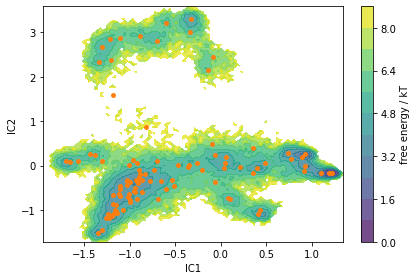

In [42]:
cluster = pyemma.coordinates.cluster_kmeans(vamp, k=100, max_iter=50, stride=5)

print(cluster.clustercenters.shape)

plt.figure(figsize=(5, 5))
pyemma.plots.plot_free_energy(vamp_concatenated[:,0], vamp_concatenated[:,1], cbar=True, cmap='viridis', ncontours=10, alpha=0.75)
# plot the trace of the trajectory
plt.scatter(cluster.clustercenters[:, 0], cluster.clustercenters[:, 1], s=15, c='C1')
plt.xlabel('IC1')
plt.ylabel('IC2')
plt.tight_layout()

In [7]:
import os, sys, glob, subprocess, time, csv, itertools, math
import h5py

def score_cv(feat_data, dim, lag, number_of_splits, validation_fraction, out_name, save):
    """Compute a cross-validated VAMP2 score.

    We randomly split the list of independent trajectories into
    a training and a validation set, compute the VAMP2 score,
    and repeat this process several times.

    Parameters
    ----------
    data : list of numpy.ndarrays
        The input data.
    dim : int
        Number of processes to score; equivalent to the dimension
        after projecting the data with VAMP2.
    lag : int
        Lag time for the VAMP2 scoring.
    number_of_splits : int, optional, default=10
        How often do we repeat the splitting and score calculation.
    validation_fraction : int, optional, default=0.5
        Fraction of trajectories which should go into the validation
        set during a split.
    """
    nval = int(len(feat_data) * validation_fraction)
    scores = np.zeros(number_of_splits)
    for n, _ in enumerate(scores):
        ival = np.random.choice(len(feat_data), size=nval, replace=False)
        valid = [d for i, d in enumerate(feat_data) if i not in ival]
        vamp = pyemma.coordinates.vamp(valid, lag=lag, dim=dim, scaling = 'km')
        scores[n] = vamp.score([d for i, d in enumerate(feat_data) if i in ival])

    if save == True:
        np.save(out_name,scores)
    return scores

### TEMP FUNCTION STORAGE, NEED TO COMMENT ADN CLEAN BEFORE PUBLISHING

def tica(feat, lag_time, save, save_dir, save_name, feat_name):
    feat_list = np.ndarray.tolist(feat)
    tica = pyemma.coordinates.tica(feat_list, dim=8, lag=lag_time, stride=1, kinetic_map=True, commute_map=False)
    tica_getoutput = tica.get_output()
    if save == True:
        tica.save(f'{save_dir}/{feat_name}_tica_raw.h5', overwrite=True)
        np.save(f'{save_dir}/{feat_name}_tica_getoutput.npy', tica_getoutput)
    return tica_getoutput

def k_means(tica_getoutput, n_cluster, max_iter, save, save_dir, save_name, feat_name):
    cluster = pyemma.coordinates.cluster_kmeans(tica_getoutput, k=n_cluster, max_iter=max_iter)
    cluster_getoutput = cluster.get_output()
    cluster_dtrajs = cluster.dtrajs
    cluster_centers = cluster.clustercenters
    if save == True:
        cluster.save(f'{save_dir}/{feat_name}_k{n_cluster}_means_raw.h5', overwrite=True)
        np.save(f'{save_dir}/{feat_name}_k{n_cluster}_means_getoutput.npy', cluster_getoutput)
        np.save(f'{save_dir}/{feat_name}_k{n_cluster}_means_dtrajs.npy', cluster_dtrajs)
        np.save(f'{save_dir}/{feat_name}_k{n_cluster}_means_centers.npy', cluster_centers)
    return cluster, cluster_centers

def generate_msm(cluster, n_cluster, msm_lag, save, save_dir, save_name, feat_name):
    msm = pyemma.msm.estimate_markov_model(cluster.dtrajs, msm_lag)
    if save == True:
        state_frac_used = msm.active_state_fraction
        count_frac_used = msm.active_count_fraction
        feat_act_set = msm.active_set
        eigvec = msm.eigenvectors_right()

        log_save = open(f'{save_dir}/{feat_name}_k{n_cluster}_msm_params.log','w')
        log_save.write(f'Fraction of states used: {state_frac_used}.\nFraction of counts used: {count_frac_used}. \nMain indices of the active states (members of the largest connected set): {list(feat_act_set)}. \nStationary distribution across states: {msm.stationary_distribution}. \nFirst eigenvector is one: {np.allclose(eigvec[:, 0], 1, atol=1e-15)} (min={eigvec[:, 0].min()}, max={eigvec[:, 0].max()})')
        log_save.close()
        msm.save(f'{save_dir}/{feat_name}_k{n_cluster}_msm_raw.h5',  overwrite=True)
    return msm

In [10]:
dim = 4
lag = 100
number_of_splits = 2
validation_fraction = 0.5
out_name = 'score_cv_out'
save = True

scores = score_cv(data, dim, lag, number_of_splits, validation_fraction, out_name, save)

calculate covariances:   0%|                                               | 0/12 [00:00<?, ?it/s]

calculate covariances:   0%|                                               | 0/12 [00:00<?, ?it/s]

calculate covariances:   0%|                                               | 0/12 [00:00<?, ?it/s]

calculate covariances:   0%|                                               | 0/12 [00:00<?, ?it/s]

In [11]:
scores

array([3.76139047, 4.25934169])

In [ ]:
vamp = pyemma.coordinates.vamp(data_concatenated, lag=20, dim=3)
